<a href="https://colab.research.google.com/github/emilioenlaluna/Machine-Learning-Models-Comparation/blob/main/Examen_Aprendizaje_Inteligente_Parcial_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img  src="https://www.uaa.mx/portal/wp-content/uploads/2022/08/UAA-LOGO.png">

# UNIVERSIDAD AUTÓNOMA DE AGUASCALIENTES

# CENTRO DE CIENCIAS BASICAS

# DEPARTAMENTO DE CIENCIAS DE LA COMPUTACIÓN

# APRENDIZAJE INTELIGENTE

# INGENIERÍA EN COMPUTACIÓN INTELIGENTE

# Examen Aprendizaje Inteligente Parcial II

#Profesor: Francisco Javier Luna Rosas

# César Omar Alatorre López 

# César Arturo Montoya Esqueda 

# Cristian Israel Donato Flores 

# Emilio Luna Pérez

# Gabriel Melchor Campos

# Semestre Enero-Junio 2023


El análisis de sentimientos, a veces también denominado minería de opiniones, es una conocida 
sub-disciplina del amplio campo del PLN (Procesamiento del Lenguaje Natural); está relacionado 
con el análisis de la polaridad de documentos. Una tarea popular en el análisis de sentimiento es 
la clasificación de documentos basados en las emociones u opiniones expresadas de los autores 
respecto a un tema en particular. El conjunto de datos de críticas de cine consiste en 50000 
críticas de cine polarizadas etiquetadas como negativas y como positivas. Aquí, positiva significa 
que una película ha sido clasificada con más de seis estrellas, mientras que negativa significa que 
una película ha sido clasificada con menos de cinco estrellas.

 a) Una explicación del Pre-procesamiento de datos para generar un formato adecuado de los datos. 

Lectura el dataset

In [1]:
#Importamos pandas
import pandas as pd
#Leemos el dataset
df = pd.read_csv('movie_data.csv')
#Mostramos las primeras filas
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


Limpieza de datos

In [2]:
#Funcion auxiliar de limpieza
import re
def Limpiador(text):
    # Remover tags de html
    text = re.sub('<[^<]*>','',text)
    
    # Almacenar temporalmente los emoticons
    emoticons = ''.join(re.findall('[:;=]-+[\)\(pPD]+',text))
    
    # Elimine los caracteres que no son palabras y combinar los emoticones
    text = re.sub('\W+',' ',text.lower()) + emoticons.replace('-','')
    
    return text

In [3]:
#Funcion para remover emojis
def RemoverEmoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [4]:
#Aplicamos los limpiadores
df['review'] = df['review'].apply(Limpiador)

In [5]:
#Remover Emojis
df['review']=df['review'].apply(lambda x: RemoverEmoji(x))

In [6]:
#Normalizar a utf-8, remover acentos
from unicodedata import normalize

RemoverAcentos = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["review"] = df["review"].apply(RemoverAcentos)

In [7]:
#Mostramos datos limpios
df.head(10)

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0
5,leave it to braik to put on a good show finall...,1
6,nathan detroit frank sinatra is the manager of...,1
7,to understand crash course in the right contex...,1
8,i ve been impressed with chavez s stance again...,1
9,this movie is directed by renny harlin the fin...,1


b) Una explicación del modelo bolsa de palabras o cualquier otro analizador liguistico aplicado al 
Dataset de críticas de cine. 

Descargamos paquetes auxiliares del toolkit de procesamiento de lenguaje natural

Hemos descargado la lista de palabras vacías (stopwords) de nltk, que es una biblioteca de procesamiento de lenguaje natural en Python.

In [8]:
#importamos el toolkit de procesamiento de lenguaje natural
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


Las palabras vacías son palabras comunes que a menudo se eliminan de los textos durante el análisis de texto porque no aportan mucho significado en sí mismas. Ejemplos de palabras vacías en inglés incluyen "a", "an", "the", "in", "on", "of", etc.

In [9]:
#Importamos stopwords
from nltk.corpus import stopwords
#Seleccionamos el lenguaje
stop = stopwords.words('english')

In [ ]:
#Importamos el tokenizador de palabras
from nltk import word_tokenize
#Seleccioanmos idioma
stop_words = set(stopwords.words('english'))
#Seleccionamos la columna de review
corpora = df["review"].values
#Tokenizamos todas las entradas del dataset en review
tokenized = [word_tokenize(corpus) for corpus in corpora]


In [ ]:
#Eliminamos los stopwords de todas las entradas del dataset que ya ha sido tokenizado
tokens_sin_stopwords = [[word for word in sublist if word.lower() not in stop_words] for sublist in tokenized]


In [ ]:
#Eliminamos las palabras de tamaño 1
tokenized_final = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokens_sin_stopwords]


In [ ]:
#Mostramos un ejemplo tokenizado y sin stopwords
print(tokenized_final[2222])

['let', 'see', 'advantages', 'watching', 'piranha', 'piranha', 'well', 'never', 'seen', 'anything', 'venezuela', 'lot', 'travelogue', 'footage', 'caracas', 'countryside', 'jungle', 'side', 'various', 'native', 'peoples', 'work', 'play', 'well', 'plenty', 'indigenous', 'wildlife', 'like', 'william', 'smith', 'plays', 'bit', 'git', 'always', 'wont', 'william', 'smith', 'could', 'probably', 'pass', 'fund', 'raising', 'film', 'save', 'children', 'organization', 'benefits', 'third', 'world', 'time', 'really', 'see', 'fish', 'title', 'opening', 'credits', 'mutant', 'killer', 'fish', 'like', 'roger', 'corman', 'singly', 'named', 'piranha', 'figure', 'twice', 'fish', 'title', 'would', 'twice', 'many', 'monster', 'fish', 'preying', 'characters', 'alas', 'case', 'story', 'starts', 'photojournalist', 'brother', 'coming', 'venezuela', 'story', 'one', 'last', 'untouched', 'places', 'planet', 'motivation', 'quickly', 'changes', 'one', 'wanting', 'find', 'diamonds', 'apparently', 'fairly', 'plentiful

c) Una explicación de la transformación de las palabras en vectores de características (utilice la 
frecuencia de termino - frecuencia inversa de documento “tf-idf” o cualquier otra técnica que 
permita transformar palabras a vectores de características).

In [ ]:
%%time
#Importamos la libreria de conversion de palabras a vectores
from gensim.models import word2vec
#Importamos numpy
import numpy as np
#Suprimimos las salidas
np.set_printoptions(suppress=True)
#Caracteristicas para convertir a vectores

#Genracion de 513 columnas para entrenar
feature_size = 513
#Tamaño del contexto de palabras
context_size = 8
#Palabra minima para vectorizar
min_word = 1

word_vec= word2vec.Word2Vec(tokenized_final, vector_size=feature_size, \
                            window=context_size, min_count=min_word, \
                            epochs=100, seed=42)

CPU times: user 1h 11min 34s, sys: 11.3 s, total: 1h 11min 46s
Wall time: 41min 2s


Este código extrae los vectores de palabras de un modelo entrenado de Word2Vec y crea un dataframe de Pandas que contiene cada palabra como índice y sus correspondientes vectores como valores.

La primera línea crea una lista de tuplas donde cada tupla contiene una palabra y su índice correspondiente en el modelo entrenado de Word2Vec. La segunda línea utiliza la función zip() de Python para separar las palabras y los índices en dos tuplas diferentes. La tercera línea crea un dataframe de Pandas utilizando los índices como índice de filas y los vectores correspondientes como valores en cada columna. Por último, la función head() se utiliza para mostrar las primeras filas del dataframe.

In [ ]:
# crea una lista de tuplas donde cada tupla contiene una palabra y su índice correspondiente en el modelo entrenado de Word2Vec
word_vec_unpack = [(word, idx) for word, idx in \
                   word_vec.wv.key_to_index.items()]

#segunda línea utiliza la función zip() de Python para separar las palabras y los índices en dos tuplas diferentes
tokens, indexes = zip(*word_vec_unpack)

#crea un dataframe de Pandas utilizando los índices como índice de filas y los vectores correspondientes como valores en cada columna
word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

#la función head() se utiliza para mostrar las primeras filas del dataframe
word_vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
movie,0.909647,-2.718915,0.985988,0.250298,-2.409328,0.930899,0.292603,-0.771331,1.375404,1.384636,...,-0.290232,2.436790,-0.055041,0.289791,-0.519519,0.451160,-1.053871,0.972423,-0.804375,-0.807236
film,0.813526,-1.436343,0.840692,0.987133,-2.487781,1.021468,0.344112,-0.540156,1.001559,1.742546,...,-1.069700,1.282892,-0.908652,0.815983,-1.580091,-0.656278,-0.865545,0.300703,-0.384948,-1.388546
one,0.567326,-1.691533,0.754129,1.304220,-0.699987,-0.044660,0.176730,-1.224390,0.011409,0.054717,...,0.432627,0.150864,-0.605998,-0.016886,-0.100517,-0.133855,-1.446879,-0.945326,-0.890434,-0.096125
like,1.570343,-2.286618,0.675451,-0.854443,-0.448872,-0.258513,0.660953,-0.419855,1.847473,1.502914,...,-0.735519,0.442971,0.501078,0.942887,-0.552244,1.753167,-0.141793,0.094328,-0.377412,-0.063978
good,1.434482,-1.447059,2.466118,0.251349,0.793027,-0.248066,-1.304903,0.649498,1.954626,2.068033,...,-0.448067,1.676829,1.215439,0.000427,-0.773325,2.363121,-0.284882,-0.933245,-0.271371,1.396786


In [ ]:
# crea una matriz NumPy a partir de los tokens previamente procesados
tokenized_array = np.array(tokenized_final)
#se crea una matriz de modelo para cada documento en el corpus procesado, promediando los vectores de cada palabra en el documento utilizando la matriz previamente creada
model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

<ipython-input-29-0cdf267a2b85>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tokenized_array = np.array(tokenized_final)


In [ ]:
#Creamos un nuevo dataframe
model_df = pd.DataFrame(model_array)
#Agregamos la columna de sentimiento
model_df["sentiment"] = df["sentiment"]

model_df.head()

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,sentiment
0,-0.169650,0.040839,-0.158676,0.221132,-0.250082,0.185220,0.281665,0.021481,0.344159,-0.705347,...,-0.155607,-0.171526,0.077252,0.018498,0.023158,0.156144,-0.361386,0.012767,-0.131471,1
1,0.406780,-0.665606,0.337715,-0.177916,-0.312566,0.404141,0.508959,0.059682,0.237877,0.503239,...,0.661522,0.013925,-0.066301,-0.038875,0.466838,0.087624,0.365904,-0.096943,0.267603,0
2,0.404465,-0.548155,0.494654,0.189635,-0.405861,0.196647,0.224892,-0.037889,0.374644,0.426578,...,0.312150,-0.035881,0.104245,-0.072144,-0.021473,-0.154046,0.147334,-0.022107,-0.081960,0
3,0.126849,-0.628585,0.131086,-0.025734,-0.728363,0.386605,-0.092782,0.133146,-0.148128,0.696161,...,0.452121,0.635072,-0.500141,-0.247066,0.022408,-0.537783,0.142079,-0.048278,-0.339399,1
4,0.196912,-0.306949,0.293701,0.361708,-0.412905,0.113512,0.086672,0.271352,0.234117,0.788466,...,0.271187,0.387739,-0.005168,-0.066674,0.222655,0.006991,-0.272521,-0.306186,-0.556715,0


In [ ]:
#Guardamos el dataframe para poder entrenar como un nuevo dataset
model_df.to_csv('procesed_movie_data2.csv', encoding='utf-8',index=False)

In [ ]:
#Asignamos la variable de clases
y=model_df["sentiment"]
y

0        1
1        0
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
#Eliminamos la columna y dejamos la variables para predecir
del model_df["sentiment"]
x=model_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-0.169650,0.040839,-0.158676,0.221132,-0.250082,0.185220,0.281665,0.021481,0.344159,-0.705347,...,0.220943,-0.155607,-0.171526,0.077252,0.018498,0.023158,0.156144,-0.361386,0.012767,-0.131471
1,0.406780,-0.665606,0.337715,-0.177916,-0.312566,0.404141,0.508959,0.059682,0.237877,0.503239,...,-0.292132,0.661522,0.013925,-0.066301,-0.038875,0.466838,0.087624,0.365904,-0.096943,0.267603
2,0.404465,-0.548155,0.494654,0.189635,-0.405861,0.196647,0.224892,-0.037889,0.374644,0.426578,...,-0.041440,0.312150,-0.035881,0.104245,-0.072144,-0.021473,-0.154046,0.147334,-0.022107,-0.081960
3,0.126849,-0.628585,0.131086,-0.025734,-0.728363,0.386605,-0.092782,0.133146,-0.148128,0.696161,...,-0.738191,0.452121,0.635072,-0.500141,-0.247066,0.022408,-0.537783,0.142079,-0.048278,-0.339399
4,0.196912,-0.306949,0.293701,0.361708,-0.412905,0.113512,0.086672,0.271352,0.234117,0.788466,...,-0.311143,0.271187,0.387739,-0.005168,-0.066674,0.222655,0.006991,-0.272521,-0.306186,-0.556715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.309287,-0.687856,0.659682,-0.070795,-0.650750,-0.192954,0.024997,-0.256548,0.081913,0.554736,...,-0.433658,0.573043,-0.071213,0.177876,-0.001702,0.215655,-0.199557,0.074139,0.026097,-0.160296
49996,0.303875,-0.304371,0.028952,0.265784,-0.287641,-0.172426,0.199983,-0.054270,0.160397,0.221857,...,-0.218846,0.029128,0.085504,0.209418,-0.415298,0.069952,0.114707,0.388595,-0.006916,-0.157714
49997,-0.121825,-0.859796,0.568429,-0.255578,-0.920834,0.295648,0.257472,-0.067545,0.547711,0.502695,...,-0.113891,0.525230,-0.025840,0.087715,0.375971,-0.146961,-0.385159,-0.011386,-0.169780,0.107786
49998,0.462176,-0.246672,-0.155935,0.349714,-0.163377,0.056947,0.257554,-0.079607,0.359126,-0.064576,...,-0.263946,0.822437,0.068437,-0.180231,-0.110554,0.126845,-0.261674,-0.090120,0.078416,-0.247736


Elegimos utilizar las técnicas TF-IDF para los clasificadores de Naive Bayes y SVM porque, en conjunto, mejoran notablemente la precisión en la clasificación del texto. 

In [10]:
#Libreria de procesamiento de lenguaje natural
import nltk
#Importamos stopwords
nltk.download('stopwords')
#Seleccionamos el lenguaje
stopw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#stemming para eliminar derivaciones de palabras comunes a una palabra base como organizar, organizado, organizador, organización
# Derivación corta palabras y elimina derivaciones
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

La función tokenizer_porter toma una cadena de texto como entrada y la divide en palabras individuales utilizando el método split(). Luego, utiliza la clase PorterStemmer para aplicar el algoritmo de stemming de Porter a cada palabra y devolver una lista de las palabras reducidas a su forma base.

In [12]:
#tokenize el texto y divida la oración en palabras según la ocurrencia
#técnica steamming
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return[porter.stem(word) for word in text.split()]

TfidfVectorizer de la biblioteca sklearn.feature_extraction.text para construir una matriz TF-IDF 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(strip_accents = None,
                        lowercase = False,
                        preprocessor = None, #because we already did on our data
                        tokenizer = tokenizer_porter, #stemming function
                        use_idf = True,    #to downgrade according to frequency
                        norm = 'l2',
                        stop_words=stopw,
                        smooth_idf = True   #to avoid division by zero
                       )

#split to x, y components
Y_ = df.sentiment.values   #numpy array
X_ = tfidf.fit_transform(df.review)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(


In [15]:
from sklearn.model_selection import train_test_split
#Segmentamos las variables para evaluar y entrnar
X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_,
                                                    random_state = 42, #to get same as instructor
                                                    test_size = 0.2
                                                   )

d) Una explicación de los modelos de Machine Learning utilizando: KNN, Naive Bayes, SVM, Redes 
Neuronal, Arboles de Decisión, Random Forest y Métodos de Potenciación para clasificar las
críticas de cine (el modelo de entrenamiento puede ser tabla testing, LOOCV, k-folds, etc.). La 
presión del modelo debe ser del 95% o mayor.

Redes neuronales

In [50]:
#redes neuronales
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(58, 20,30,5,2), random_state=1)

clf.fit(X,y)
clf.score(X,y)

0.98752

In [ ]:
# Create confusion matrix para redes neuronales
from sklearn.metrics import confusion_matrix
prediccion_nn = clf.predict(x)
MC_nn = confusion_matrix(y,prediccion_nn)

presicion_global_nn = np.sum(MC_nn.diagonal())/np.sum(MC_nn)
error_global_nn = 1 - presicion_global_nn

precision_categoria_nn = pd.DataFrame(MC_nn.diagonal()/np.sum(MC_nn,axis=1)).T

print ("Matriz de confusión: \n",MC_nn)
print ("Precisión global: \n",presicion_global_nn)
print ("Error global: \n",error_global_nn)
print ("Precisión por catergoria: \n",precision_categoria_nn )

matriz de confucion: 
 [[24838   162]
 [  701 24299]]
precision global: 
 0.98274
error global: 
 0.017260000000000053
precision por catergoria: 
          0        1
0  0.99352  0.97196


KNN

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
#Generamos la instancia
knn = KNeighborsClassifier(n_neighbors=22, weights='distance')
#Entrenamos usando tabla completa
knn.fit(x, y)
#Evaluamos usando todas las entradas
knn.score(x, y)

1.0

In [ ]:
# Create confusion matrix para knn
from sklearn.metrics import confusion_matrix
prediccion = knn.predict(x)
MC = confusion_matrix(y,prediccion)

presicion_global = np.sum(MC.diagonal())/np.sum(MC)
error_global = 1 - presicion_global

precision_categoria = pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T

print ("Matriz de confusión: \n",MC)
print ("Precisión global: \n",presicion_global)
print ("Error global: \n",error_global)
print ("Precisión por catergoria: \n",precision_categoria )

matriz de confucion: 
 [[25000     0]
 [    0 25000]]
precision global: 
 1.0
error global: 
 0.0
precision por catergoria: 
      0    1
0  1.0  1.0


Arboles de desicion

In [ ]:
#Arboles de desicion
from sklearn import tree
#Generamos la instacia
desiciontree = tree.DecisionTreeClassifier()
#Entrenamos usando tabla completa
desiciontree.fit(x,y)
#Evaluamos usando todas las entradas
desiciontree.score(x,y)

1.0

In [ ]:
# Create confusion matrix para arboles de desición
from sklearn.metrics import confusion_matrix
prediccion_dt = desiciontree.predict(x)
MC_desiciontree = confusion_matrix(y,prediccion_dt)

presicion_global_dt = np.sum(MC_desiciontree.diagonal())/np.sum(MC_desiciontree)
error_global_dt = 1 - presicion_global_dt

precision_categoria_dt = pd.DataFrame(MC_desiciontree.diagonal()/np.sum(MC_desiciontree,axis=1)).T

print ("Matriz de confusión: \n",MC_desiciontree)
print ("Precisión global: \n",presicion_global_dt)
print ("Error global: \n",error_global_dt)
print ("Precisión por catergoria: \n",precision_categoria_dt )

matriz de confucion: 
 [[25000     0]
 [    0 25000]]
precision global: 
 1.0
error global: 
 0.0
precision por catergoria: 
      0    1
0  1.0  1.0


Bosques aleatorios

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Generamos la instancia
randomforest = RandomForestClassifier()
#Entrenamos usando tabla completa
randomforest.fit(x,y)
#Evaluamos usando todas las entradas
randomforest.score(x,y)

1.0

In [ ]:
# Create confusion matrix para bosques aleatorios
from sklearn.metrics import confusion_matrix
prediccion_randomforest = randomforest.predict(x)
MC_randomforest = confusion_matrix(y,prediccion_randomforest)

presicion_global_rf = np.sum(MC_randomforest.diagonal())/np.sum(MC_randomforest)
error_global_rd = 1 - presicion_global_rf

precision_categoria_rf = pd.DataFrame(MC_randomforest.diagonal()/np.sum(MC_randomforest,axis=1)).T

print ("Matriz de confusión: \n",MC_randomforest)
print ("Precisión global: \n",presicion_global_rf)
print ("Error global: \n",error_global_rd)
print ("Precisión por catergoria: \n",precision_categoria_rf )

matriz de confucion: 
 [[25000     0]
 [    0 25000]]
precision global: 
 1.0
error global: 
 0.0
precision por catergoria: 
      0    1
0  1.0  1.0


Adaboost Clasificador

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
#Generamos la instancia
adaboostclasifier = AdaBoostClassifier(n_estimators=100,base_estimator=RandomForestClassifier())
#Entrenamos usando tabla completa
adaboostclasifier.fit(x, y)
#Evaluamos usando todas las entradas
adaboostclasifier.score(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


1.0

In [ ]:
# Create confusion matrix para Adaboost Clasificador
from sklearn.metrics import confusion_matrix
prediccion_adaboostclasifier = adaboostclasifier.predict(x)
MC_adaboost = confusion_matrix(y,prediccion_adaboostclasifier)

presicion_global_ab = np.sum(MC_adaboost.diagonal())/np.sum(MC_adaboost)
error_global_ab = 1 - presicion_global_ab

precision_categoria_ab = pd.DataFrame(MC_adaboost.diagonal()/np.sum(MC_adaboost,axis=1)).T

print ("Matriz de confusión: \n",MC_adaboost)
print ("Presición global: \n",presicion_global_ab)
print ("Error global: \n",error_global_ab)
print ("Presición por catergoria: \n",precision_categoria_ab )

matriz de confucion: 
 [[25000     0]
 [    0 25000]]
precision global: 
 1.0
error global: 
 0.0
precision por catergoria: 
      0    1
0  1.0  1.0


XGBoost Clasificador

In [ ]:
# Importaciones adicionales
from xgboost import XGBClassifier

#Generamos la instancia
xgb_classifier = XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=10,
    min_child_weight=1,
    gamma=0,
    booster='gbtree',
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=1
)
# Entrenar el clasificador XGBoost
xgb_classifier.fit(x, y)
#Evaluamos usando todas las entradas
xgb_classifier.score(x, y)

0.99998

In [ ]:
# Create confusion matrix para xgboost
from sklearn.metrics import confusion_matrix
prediccion_xgboost = xgb_classifier.predict(x)
MC_xgboost = confusion_matrix(y,prediccion_xgboost)

presicion_global_xgboost = np.sum(MC_xgboost.diagonal())/np.sum(MC_xgboost)
error_global_xgboost = 1 - presicion_global_xgboost

precision_categoria_xgboost = pd.DataFrame(MC_xgboost.diagonal()/np.sum(MC_xgboost,axis=1)).T

print ("Matriz de confusión: \n",MC_xgboost)
print ("Presición global: \n",presicion_global_xgboost)
print ("Error global: \n",error_global_xgboost)
print ("Presición por catergoria: \n",precision_categoria_xgboost )

matriz de confucion: 
 [[25000     0]
 [    1 24999]]
precision global: 
 0.99998
error global: 
 2.0000000000020002e-05
precision por catergoria: 
      0        1
0  1.0  0.99996


In [ ]:
#Maquinas de soporte vectorial
from sklearn import svm

#Create a svm Classifier
maquinassoporte = svm.SVC() 

maquinassoporte.fit(X_,Y_)


In [24]:
maquinassoporte.score(X_test, Y_test) 

0.9869

In [27]:
# Create confusion matrix para Maquinas de soporte vectorial
from sklearn.metrics import confusion_matrix
prediccion_svm = maquinassoporte.predict(X_test)
MC_svm = confusion_matrix(Y_test,prediccion_svm)

presicion_global_svm = np.sum(MC_svm.diagonal())/np.sum(MC_svm)
error_global_svm = 1 - presicion_global_svm

precision_categoria_svm = pd.DataFrame(MC_svm.diagonal()/np.sum(MC_svm,axis=1)).T

print ("Matriz de confusión: \n",MC_svm)
print ("Presición global: \n",presicion_global_svm)
print ("Error global: \n",error_global_svm)
print ("Presición por catergoria: \n",precision_categoria_svm )

Matriz de confusión: 
 [[4966   68]
 [  63 4903]]
Presición global: 
 0.9869
Error global: 
 0.0131
Presición por catergoria: 
           0         1
0  0.986492  0.987314


In [16]:
#Naive Bayes
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB

pipe_mnb = make_pipeline(StandardScaler(with_mean=False), MultinomialNB())
pipe_mnb.fit(X_,Y_) # apply scaling on training data

pipe_mnb.score(X_test, Y_test) 

0.9397

In [26]:
# Create confusion matrix para Naive Bayes
from sklearn.metrics import confusion_matrix
import numpy as np

prediccion_bayes = pipe_mnb.predict(X_test)
MC_bayes = confusion_matrix(Y_test,prediccion_bayes)

presicion_global_bayes = np.sum(MC_bayes.diagonal())/np.sum(MC_bayes)
error_global_bayes = 1 - presicion_global_bayes

precision_categoria_bayes = pd.DataFrame(MC_bayes.diagonal()/np.sum(MC_bayes,axis=1)).T

print ("Matriz de confusión: \n",MC_bayes)
print ("Presición global: \n",presicion_global_bayes)
print ("Error global: \n",error_global_bayes)
print ("Presición por catergoria: \n",precision_categoria_bayes )

Matriz de confusión: 
 [[4844  190]
 [ 413 4553]]
Presición global: 
 0.9397
Error global: 
 0.06030000000000002
Presición por catergoria: 
           0         1
0  0.962257  0.916834


e) Una explicación del análisis comparativo de modelos de Machine Learning utilizando los clasificadores previamente mencionados, el análisis deberá comparar: la precisión del modelo, el error del modelo, precisión negativa especificidad), precisión positiva (sensibilidad), falsos positivos, falsos negativos, asertividad positiva, asertividad negativa.

In [57]:
# Agregar los modelos al diccionario
models_dict = {
    "Arboles de desición": desiciontree,
    "Bosques Aleatorios": randomforest,
    "AdaBoostClassifier": adaboostclasifier,
    "XGB_Classifier": xgb_classifier,
    "Redes Neuronales":clf,
    "KNN":knn,
}

In [60]:

#   "SVM":maquinassoporte


# calcular métricas de evaluación
tn_svm, fp_svm, fn_svm, tp_svm = MC_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
fpr_svm = fp_svm / (fp_svm + tn_svm)
fnr_svm = fn_svm / (fn_svm + tp_svm)
ppv_svm = tp_svm / (tp_svm + fp_svm)
npv_svm = tn_svm / (tn_svm + fn_svm)

# mostrar informe de evaluación
print(f"Precisión positiva (sensibilidad): {sensitivity_svm}")
print(f"Precisión negativa (especificidad): {specificity_svm}")
print(f"Falsos positivos (tasa de falsos positivos): {fpr_svm}")
print(f"Falsos negativos (tasa de falsos negativos): {fnr_svm}")
print(f"Asertividad positiva: {ppv_svm}")
print(f"Asertividad negativa: {npv_svm}")


Precisión positiva (sensibilidad): 0.9873137333870318
Precisión negativa (especificidad): 0.9864918553833929
Falsos positivos (tasa de falsos positivos): 0.013508144616607072
Falsos negativos (tasa de falsos negativos): 0.012686266612968183
Asertividad positiva: 0.9863206598269966
Asertividad negativa: 0.9874726585802346


In [61]:
#   "Naive Bayes": pipe_mnb,

tn_bayes, fp_bayes, fn_bayes, tp_bayes = MC_bayes.ravel()
sensitivity_bayes = tp_bayes / (tp_bayes + fn_bayes)
specificity_bayes = tn_bayes / (tn_bayes + fp_bayes)
fpr_bayes = fp_bayes / (fp_bayes + tn_bayes)
fnr_bayes = fn_bayes / (fn_bayes + tp_bayes)
ppv_bayes = tp_bayes / (tp_bayes + fp_bayes)
npv_bayes = tn_bayes / (tn_bayes + fn_bayes)

# mostrar informe de evaluación
print(f"Precisión positiva (sensibilidad): {sensitivity_bayes}")
print(f"Precisión negativa (especificidad): {specificity_bayes}")
print(f"Falsos positivos (tasa de falsos positivos): {fpr_bayes}")
print(f"Falsos negativos (tasa de falsos negativos): {fnr_bayes}")
print(f"Asertividad positiva: {ppv_bayes}")
print(f"Asertividad negativa: {npv_bayes}")


Precisión positiva (sensibilidad): 0.9168344744260974
Precisión negativa (especificidad): 0.9622566547477155
Falsos positivos (tasa de falsos positivos): 0.03774334525228447
Falsos negativos (tasa de falsos negativos): 0.08316552557390254
Asertividad positiva: 0.9599409656335652
Asertividad negativa: 0.9214380825565912


In [58]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# crear listas vacías para cada métrica de evaluación
models = []
accuracies = []
sensitivities = []
specificities = []
fprs = []
fnrs = []
ppvs = []
npvs = []

# iterar sobre cada modelo y calcular las métricas de evaluación
for model_name, model in models_dict.items():
    y_true = model.predict(X)
    y_pred = y
    conf_mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    # agregar las métricas al dataframe
    models.append(model_name)
    accuracies.append(model.score(X, y))
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    fprs.append(fpr)
    fnrs.append(fnr)
    ppvs.append(ppv)
    npvs.append(npv)

# crear el dataframe y mostrarlo en la consola
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Sensitivity": sensitivities,
    "Specificity": specificities,
    "FPR": fprs,
    "FNR": fnrs,
    "PPV": ppvs,
    "NPV": npvs
})
print(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature

                 Model  Accuracy  Sensitivity  Specificity       FPR  \
0  Arboles de desición   1.00000     1.000000     1.000000  0.000000   
1   Bosques Aleatorios   1.00000     1.000000     1.000000  0.000000   
2   AdaBoostClassifier   1.00000     1.000000     1.000000  0.000000   
3       XGB_Classifier   0.99998     1.000000     0.999960  0.000040   
4     Redes Neuronales   0.98752     0.999549     0.976057  0.023943   
5                  KNN   1.00000     1.000000     1.000000  0.000000   

        FNR      PPV      NPV  
0  0.000000  1.00000  1.00000  
1  0.000000  1.00000  1.00000  
2  0.000000  1.00000  1.00000  
3  0.000000  0.99996  1.00000  
4  0.000451  0.97548  0.99956  
5  0.000000  1.00000  1.00000  


In [66]:
# agregar las métricas al dataframe
models.append("Bayes")
accuracies.append(0.9397)
sensitivities.append(sensitivity_bayes)
specificities.append(specificity_bayes)
fprs.append(fpr_bayes)
fnrs.append(fnr_bayes)
ppvs.append(ppv_bayes)
npvs.append(npv_bayes)

models.append("SVM")
accuracies.append(0.9869)
sensitivities.append(sensitivity_svm)
specificities.append(specificity_svm)
fprs.append(fpr_svm)
fnrs.append(fnr_svm)
ppvs.append(ppv_svm)
npvs.append(npv_svm)

# crear el dataframe y mostrarlo en la consola
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Sensitivity": sensitivities,
    "Specificity": specificities,
    "FPR": fprs,
    "FNR": fnrs,
    "PPV": ppvs,
    "NPV": npvs
})
print(df)

                 Model  Accuracy  Sensitivity  Specificity       FPR  \
0  Arboles de desición   1.00000     1.000000     1.000000  0.000000   
1   Bosques Aleatorios   1.00000     1.000000     1.000000  0.000000   
2   AdaBoostClassifier   1.00000     1.000000     1.000000  0.000000   
3       XGB_Classifier   0.99998     1.000000     0.999960  0.000040   
4     Redes Neuronales   0.98752     0.999549     0.976057  0.023943   
5                  KNN   1.00000     1.000000     1.000000  0.000000   
6                Bayes   0.93970     0.916834     0.962257  0.037743   
7                  SVM   0.98690     0.987314     0.986492  0.013508   

        FNR       PPV       NPV  
0  0.000000  1.000000  1.000000  
1  0.000000  1.000000  1.000000  
2  0.000000  1.000000  1.000000  
3  0.000000  0.999960  1.000000  
4  0.000451  0.975480  0.999560  
5  0.000000  1.000000  1.000000  
6  0.083166  0.959941  0.921438  
7  0.012686  0.986321  0.987473  


f) Una explicación del análisis comparativo de modelos de Machine Learning utilizando los 
clasificadores previamente mencionados, el análisis deberá comparar los modelos utilizando la 
curva ROC.

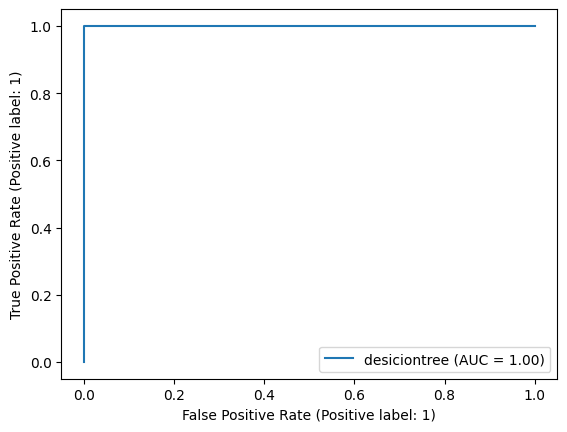

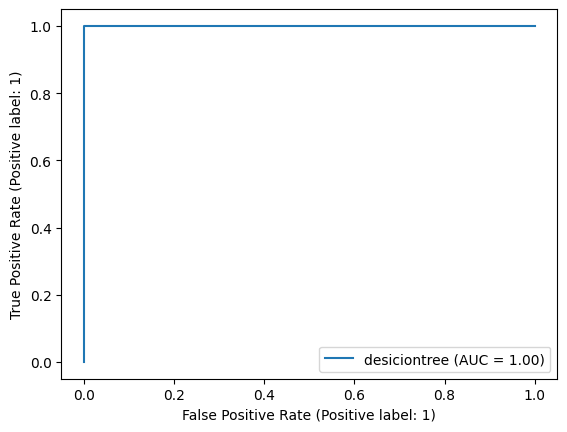

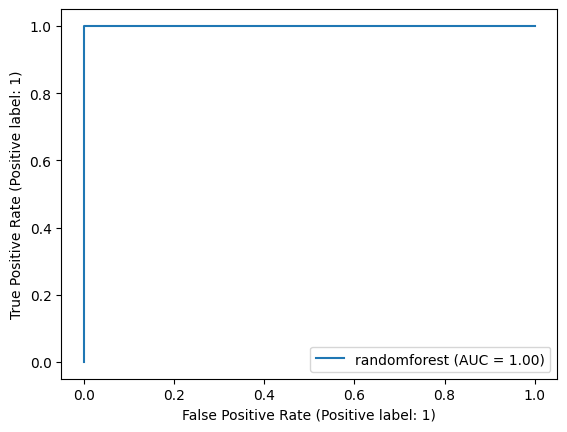

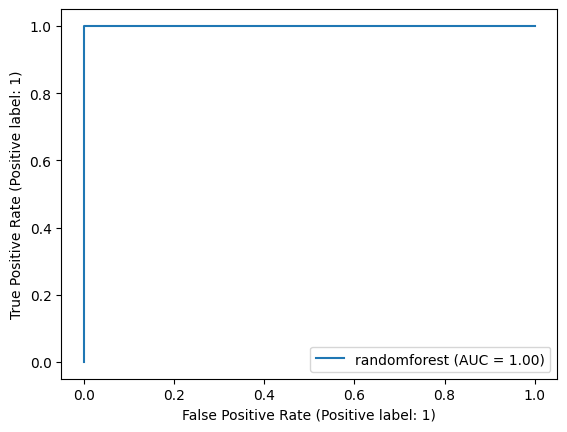

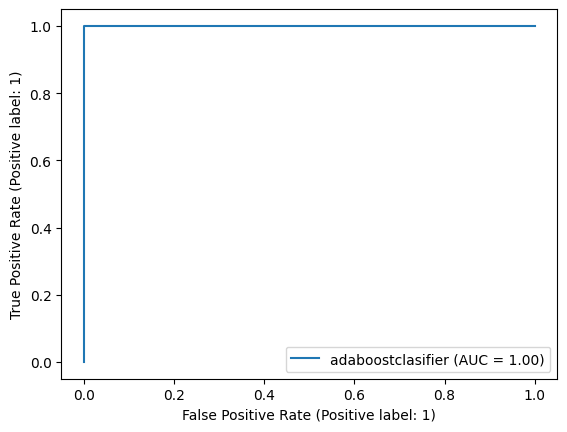

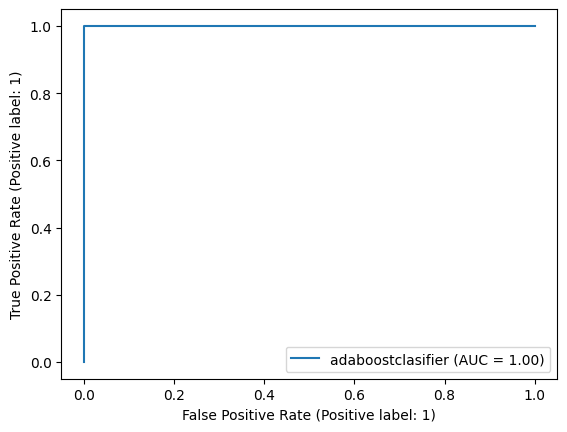

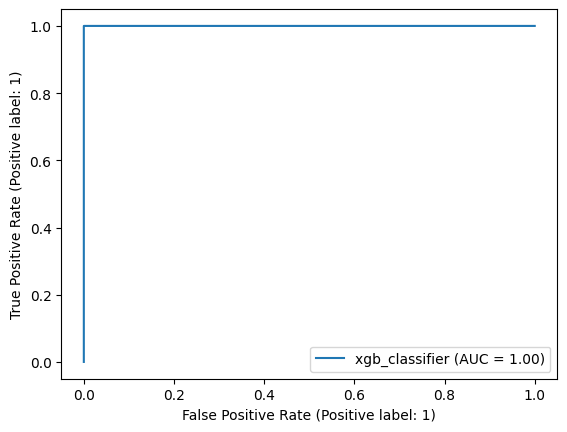

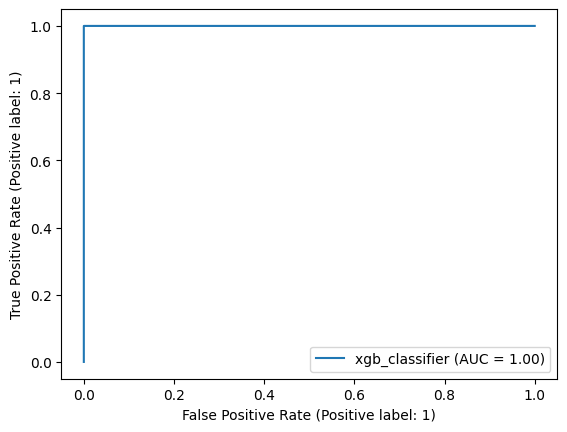

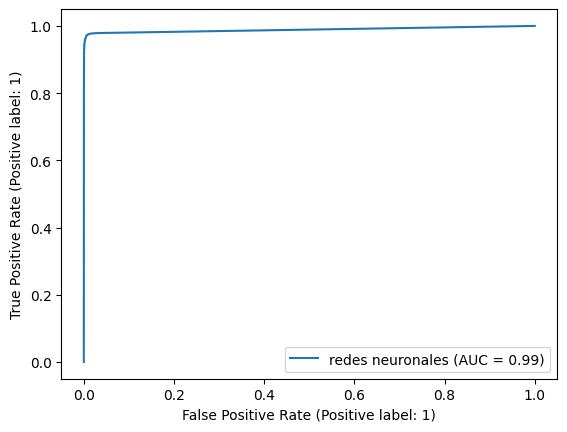

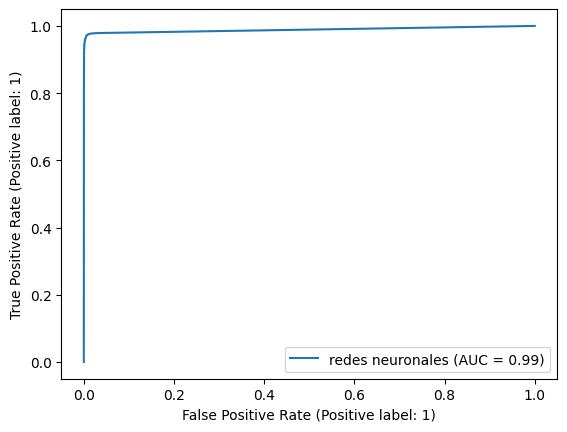

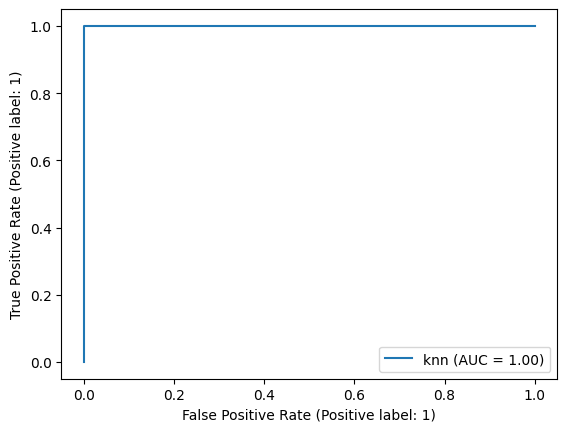

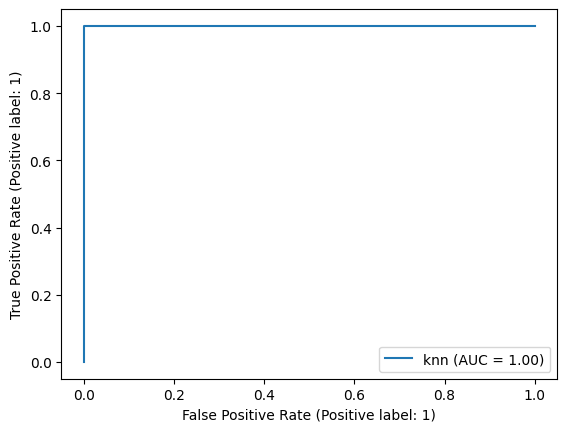

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

for name, clf in models_dict.items():
    y_pred_proba = clf.predict_proba(x)[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    svc_disp = RocCurveDisplay.from_estimator(clf, x, y, name=name)
    svc_disp.plot()

plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


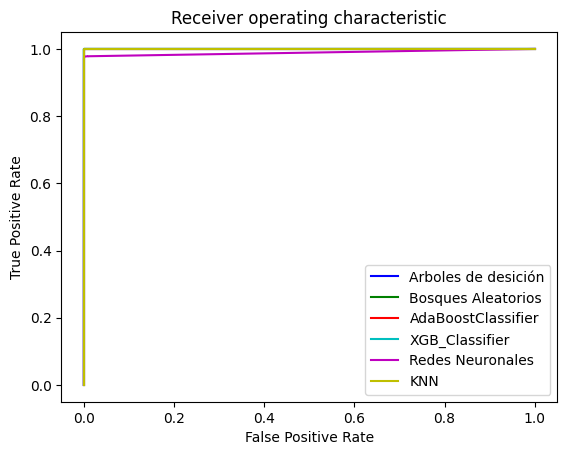

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] # list of colors to use for each curve
i = 0 # variable to keep track of current color index

for name, clasifi in models_dict.items():
  y_pred_proba = clasifi.predict_proba(X)[:,1]
  fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
  plt.plot(fpr, tpr, color=colors[i], label=name) # plot the curve with the current color
  i += 1 # increment the color index for the next curve

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

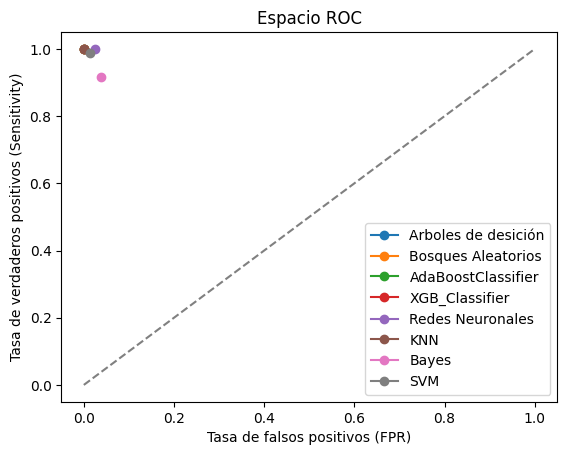

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Model': ['Arboles de desición', 'Bosques Aleatorios', 'AdaBoostClassifier', 'XGB_Classifier', 'Redes Neuronales', 'KNN', 'Bayes', 'SVM'],
    'Accuracy': [1.00000, 1.00000, 1.00000, 0.99998, 0.98752, 1.00000, 0.93970, 0.98690],
    'Sensitivity': [1.000000, 1.000000, 1.000000, 1.000000, 0.999549, 1.000000, 0.916834, 0.987314],
    'Specificity': [1.000000, 1.000000, 1.000000, 0.999960, 0.976057, 1.000000, 0.962257, 0.986492],
    'FPR': [0.000000, 0.000000, 0.000000, 0.000040, 0.023943, 0.000000, 0.037743, 0.013508],
    'FNR': [0.000000, 0.000000, 0.000000, 0.000000, 0.000451, 0.000000, 0.083166, 0.012686],
    'PPV': [1.000000, 1.000000, 1.000000, 0.999960, 0.975480, 1.000000, 0.959941, 0.986321],
    'NPV': [1.000000, 1.000000, 1.000000, 1.000000, 0.999560, 1.000000, 0.921438, 0.987473]
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Crear la figura y el eje para el gráfico
fig, ax = plt.subplots()

# Trazar la línea diagonal (representa un clasificador aleatorio)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Trazar los puntos de cada modelo en el espacio ROC
for index, row in df.iterrows():
    ax.plot(row['FPR'], row['Sensitivity'], marker='o', label=row['Model'])

# Configurar etiquetas de los ejes y título
ax.set_xlabel('Tasa de falsos positivos (FPR)')
ax.set_ylabel('Tasa de verdaderos positivos (Sensitivity)')
ax.set_title('Espacio ROC')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

Conclusiones

Después de trabajar en nuestro examen, nos dimos cuenta de que convertir los datos en vectores llevó bastante tiempo, pero era un paso necesario para poder aplicar los modelos de aprendizaje automático. Probamos modelos como SVM y Naive Bayes utilizando la técnica TF-IDF. A pesar de que su ejecución duró mucho, sus resultados no fueron tan buenos como esperábamos. 

Por eso, decidimos probar otras técnicas para mejorar los resultados y obtener una mejor precisión en la clasificación de nuestros datos. Gracias a las clases impartidas por nuestro profesor y sus explicaciones durante las sesiones, pudimos comprender mejor las distintas técnicas y enfoques para abordar el problema. 

Finalmente, con el conocimiento adquirido, logramos mejorar nuestros resultados y encontrar un enfoque que funcionara bien para nuestro examen. En general, este examen nos permitió aplicar lo aprendido en clase y obtener una valiosa experiencia práctica en la resolución de problemas de clasificación utilizando diferentes métodos de aprendizaje automático.


Bibliografía


Equipo de desarrollo de Pandas. (s. f.). Documentación de pandas. pandas. Recuperado de https://pandas.pydata.org/docs/ 

W3Schools. (s. f.). Python RegEx. Recuperado de https://www.w3schools.com/python/python_regex.asp 

GeeksforGeeks. (s. f.). Python - Derivación de palabras con NLTK. Recuperado de https://www.geeksforgeeks.org/python-stemming-words-with-nltk/ 

Desarrolladores de scikit-learn. (s. f.). sklearn.feature_extraction.text.TfidfVectorizer — Documentación de scikit-learn 1.0.1. scikit-learn. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

Desarrolladores de scikit-learn. (s. f.). scikit-learn: aprendizaje automático en Python — Documentación de scikit-learn 1.0.1. scikit-learn. Recuperado de https://scikit-learn.org/stable/